In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [2]:
# load dataset
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train=train.iloc[:,1:].values
x_test=test.iloc[:,1:].values
y_train=train['label'].values
y_test=test['label'].values
x_train[6,:].shape

(784,)

In [4]:
# Preprocess the data
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0  # Reshape and normalize training images
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0    # Reshape and normalize test images
y_train = keras.utils.to_categorical(y_train, num_classes=10)  # Convert training labels to one-hot encoded vectors
y_test = keras.utils.to_categorical(y_test, num_classes=10)    # Convert test labels to one-hot encoded vectors

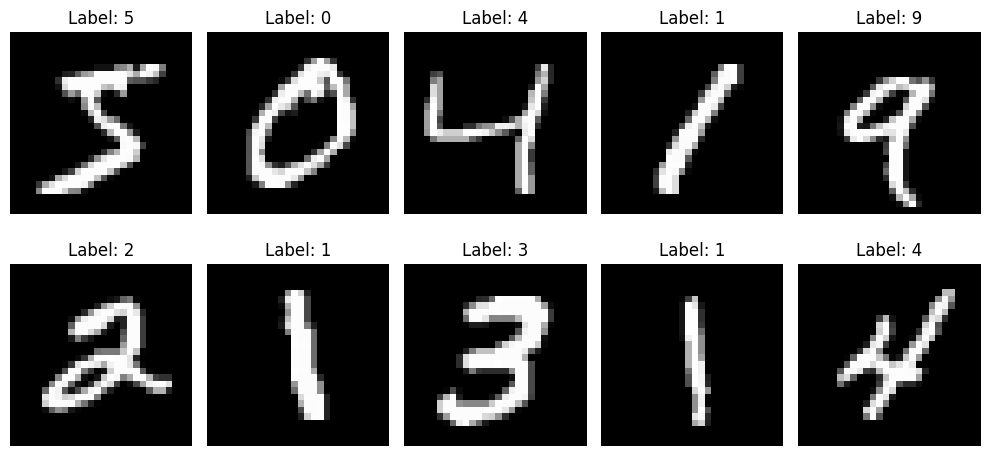

In [5]:
# Visualize sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_train[i])}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Build VGG16 model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes for MNIST

In [7]:
model.summary() # print the archticture of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 128)         0         
 g2D)                                                   

In [8]:
# print trainable parameters of model
for i in model.layers:
    print(f"Layer {i.name} : {i.count_params()} trainable parameters")
    print('----------------------------------------------')

Layer conv2d : 640 trainable parameters
----------------------------------------------
Layer conv2d_1 : 36928 trainable parameters
----------------------------------------------
Layer max_pooling2d : 0 trainable parameters
----------------------------------------------
Layer conv2d_2 : 73856 trainable parameters
----------------------------------------------
Layer conv2d_3 : 147584 trainable parameters
----------------------------------------------
Layer max_pooling2d_1 : 0 trainable parameters
----------------------------------------------
Layer flatten : 0 trainable parameters
----------------------------------------------
Layer dense : 40980 trainable parameters
----------------------------------------------
Layer dense_1 : 210 trainable parameters
----------------------------------------------


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
model.fit(x_train, y_train, batch_size=600, epochs=1, validation_data=(x_test, y_test))

100/100 [==============================] - 145s 1s/step - loss: 0.1868 - accuracy: 0.9460 - val_loss: 0.0771 - val_accuracy: 0.9760


In [12]:
y_pred = model.predict(x_test)

313/313 [==============================] - 8s 24ms/step


In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

313/313 [==============================] - 8s 25ms/step - loss: 0.0771 - accuracy: 0.9760
Test Loss: 0.0771
Test Accuracy: 0.9760


In [14]:
print(y_pred.shape,y_test.shape)

(10000, 10) (10000, 10)


In [15]:
# convert from One Hot Encoding to int values that represent int labels
num_of_classes = y_test.shape[1]
print('Number of classes : ' , num_of_classes)
true_labels = []
for label in y_test:
    true_label = np.argmax(label)
    true_labels.append(true_label)
print(true_labels[:30])

pred_labels = []
for label in y_pred:
    true_label = np.argmax(label)
    pred_labels.append(true_label)
#print(set(true_labels))
print(pred_labels[:30])

Number of classes :  10
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1]


In [16]:
precision = precision_score (true_labels,pred_labels , average='macro')
recall = recall_score(true_labels,pred_labels , average='macro')
f1 = f1_score(true_labels,pred_labels,average='macro')

print('precision_score : ' , precision )
print('recall_score : ' , recall )
print('f1_score : ' , f1 )

precision_score :  0.9761858958926327
recall_score :  0.9756708112887864
f1_score :  0.9758554047917574


[[ 975    0    2    0    0    0    0    2    1    0]
 [   1 1130    2    1    0    0    1    0    0    0]
 [   5    4 1011    0    0    1    2    6    3    0]
 [   1    0    7  978    0   10    0    8    4    2]
 [   1    0    2    1  952    0    5    0    2   19]
 [   5    1    2    6    1  867    2    2    3    3]
 [  13    4    1    0    5    1  931    0    3    0]
 [   1    1   17    4    1    0    0  998    1    5]
 [   8    2    5    1    4    1    2    6  935   10]
 [   4    6    0    3    7    2    0    3    1  983]]


<AxesSubplot: >

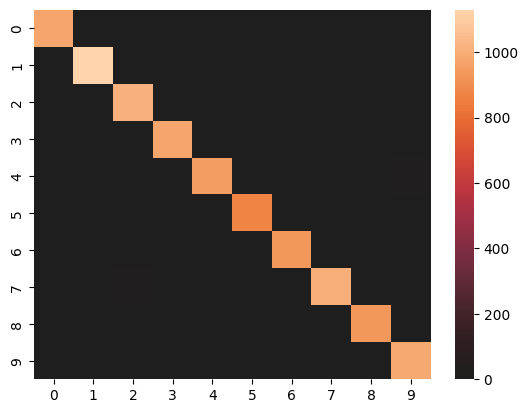

In [17]:
cm = confusion_matrix(true_labels,pred_labels)
print(cm)

sns.heatmap(cm,center=True)

In [18]:
repo = classification_report(true_labels,pred_labels)
print(repo)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

